<li><b>Nomes:</b> Luana Rodrigues </li>
<li><b>Prof.:</b> Victor Machado </li>
<li><b>Matéria:</b> Data Mining com Python </li>

#### Trabalho P2

## Consumo de álcool entre estudantes do ensino médio

Essa análise foi feita utilizando dados sobre o consumo de álcool entre estudantes do ensino médio de Portugal para a matéria de matemática disponibilizados no Kaggle. Nessa base de dados mostra as características dos alunos como idade, composição familiar entre outros.

fonte: https://www.kaggle.com/uciml/student-alcohol-consumption

E com isso, o objetivo desse trabalho é ver qual a relação do consumo de álcool com a vida acadêmica do estudande.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import datasets, metrics

df = pd.read_csv("C:\Projetos p\dados\student-mat.csv")
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


### Antes de começar, é preciso eliminar algumas colunas que não serão necessárias.

In [2]:
df.drop(["reason", "guardian", "nursery", "schoolsup", "famsup"], axis=1, inplace=True)
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


### A seguir estão as características da base de dados como o tipo de dado e as estatísticas descritivas.

In [3]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 28 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  traveltime  395 non-null    int64 
 11  studytime   395 non-null    int64 
 12  failures    395 non-null    int64 
 13  paid        395 non-null    object
 14  activities  395 non-null    object
 15  higher      395 non-null    object
 16  internet    395 non-null    object
 17  romantic    395 non-null    object
 18  famrel      395 non-null    int64 
 19  freetime    395 non-null    int64 
 20  goout     

In [5]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
traveltime    0
studytime     0
failures      0
paid          0
activities    0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

<AxesSubplot:title={'center':'Correlação entre variáveis'}>

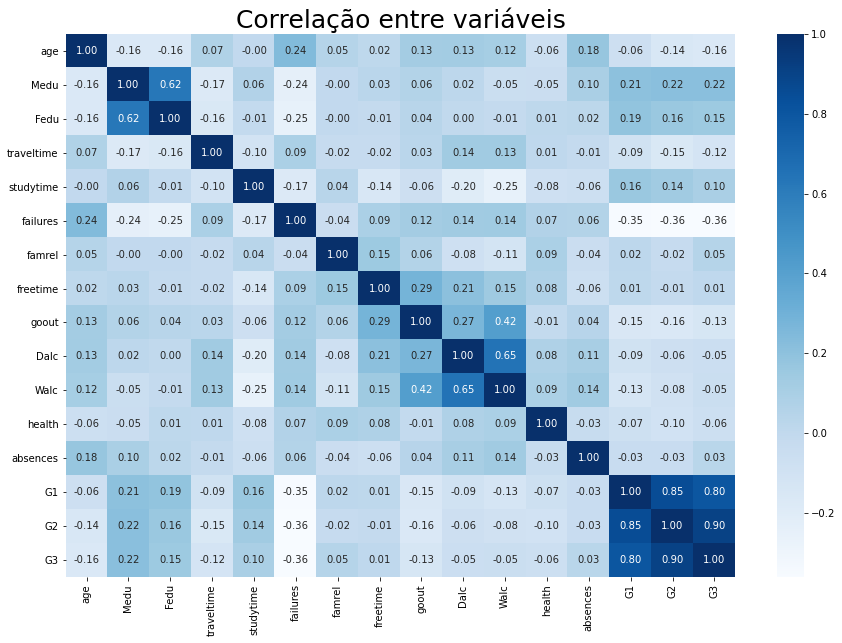

In [6]:
plt.figure(figsize=(15,10))
plt.title("Correlação entre variáveis", fontsize=25)

sns.heatmap(df.corr(), annot= True, fmt=".2f", cbar = True, cmap = "Blues")

Como é possível perceber no mapa de calor, as variáveis com maiores correlações são as Dalc e Walc que significam o consumo de álcool durante a semana e durante o fim de semana, respectivamente. Além das varíaveis que representam as notas de cada período (G1, G2 e G3). Também é possível ver que há relação alta entre o nível de educação dos pais dos alunos (Fedu e Medu).

A partir disso, iremos analisar a distribuição de alunos que consomem bebidas alcoolicas durante a semana (Dalc) e final de semana (Walc).

### Análise da base de dados.

<AxesSubplot:title={'center':'Consumo de bebidas durante o final de semana'}, xlabel='Walc'>

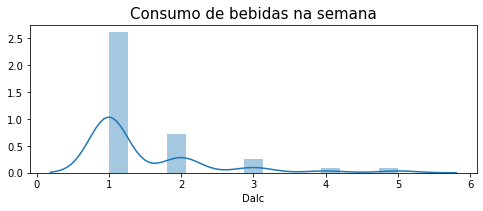

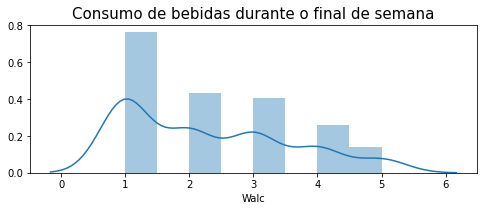

In [7]:
plt.figure(figsize=(8,6))
plt.subplot(211)
plt.title("Consumo de bebidas na semana", fontsize=15)
sns.distplot(df.Dalc, kde=True)


plt.figure(figsize=(8,6))
plt.subplot(212)
plt.title("Consumo de bebidas durante o final de semana", fontsize=15)
sns.distplot(df.Walc, kde=True)

Como é possível ver, a maioria dos estudantes consomem bebidas alcoolicas de forma considerável baixa durante a semana (1 - muito baixo, 5 - muito alto) e uma quantidade considerável mediana durante o final de semana. E a quantidade de estudantes que tem consumo muito alto de bebidas é bem pequena.


Agora analisando por gênero, sendo "sex" uma variável binária onde F significa feminino e M masculino, observamos que entre os estudantes aqueles que se indentificam como feminino possuem hábito de consumo de bebidas alcóolicas mais brandos do que o gênero masculino, com maior frequência no número 1=muito fraco, que significa baixo consumo durante os dias da semana e de muito baixo a moderado durante o fim de semana. Enquanto aqueles do gênero masculino têm consideravelmente maior número durante o final de semana (proporção considerável dos homens tem consumo na faixa moderada), e consumo considerado baixo durante a semana. 

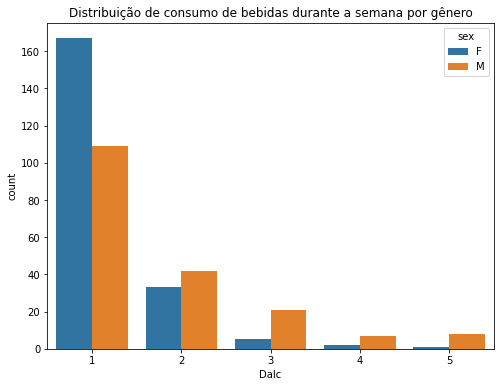

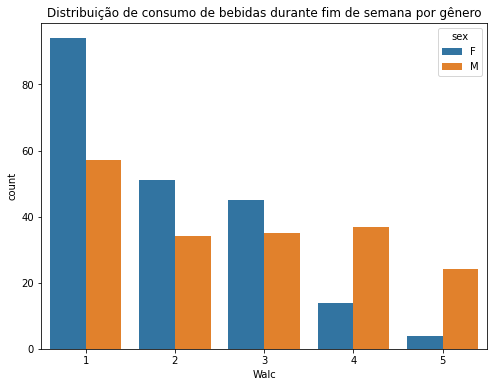

In [8]:
plt.figure(figsize=(8,6))
sns.countplot(x="Dalc", hue="sex", data = df)
plt.title("Distribuição de consumo de bebidas durante a semana por gênero")
plt.show()

plt.figure(figsize=(8,6))
sns.countplot(x="Walc", hue="sex", data = df)
plt.title("Distribuição de consumo de bebidas durante fim de semana por gênero")
plt.show()

Analisando ainda o comportamento dos estudantes com consumo de bebidas alcoólicas, agora iremos analisar a distribuição por idade.

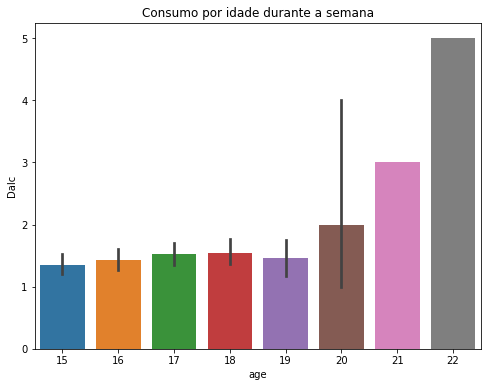

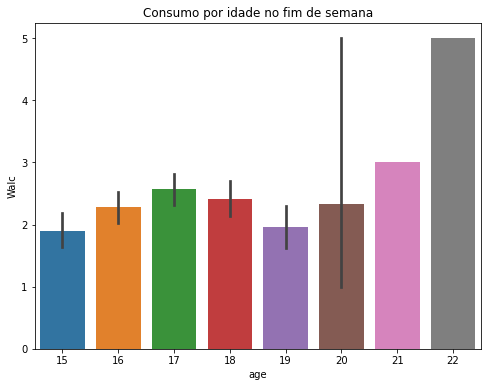

In [9]:
plt.figure(figsize=(8,6))
sns.barplot(x="age", y="Dalc", data=df)
plt.title("Consumo por idade durante a semana")
plt.show()


plt.figure(figsize=(8,6))
sns.barplot(x="age", y="Walc", data=df)
plt.title("Consumo por idade no fim de semana")
plt.show()

Como é possível ver no gráfico, o consumo aumenta em todas as idades durante o fim de semana, e a maior frequência de consumo é entre adolescentes entre 16 e 18 anos. Nota-se nos gráficos também um comportamento estranho para as idades acima de 20 anos, onde a média de consumo é muito alta, mas quando abrimos a análise das idades percebe-se que a amostra para essas idades é muito pequena o que não dá para dizer se há algum efeito significante como mostra a tabela abaixo com as médias e medianas de cada grupo de idade, além de quantos estudantes possuem cada idade.

E quando excluímos esse grupo de idades com pouca amostra, percebe melhor que a média de consumo é maior entre os jovens 16 e 18 anos ao longo de toda a semana, mesmo com a média alta entre jovens de 20 anos durante dias úteis.

In [10]:
df.groupby("age")["Dalc", "Walc"].agg(["count", "mean", "median"])

<ipython-input-10-c3313b9e4a0f>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby("age")["Dalc", "Walc"].agg(["count", "mean", "median"])


Dalc                   Walc                 
    count      mean median count      mean median
age                                              
15     82  1.353659      1    82  1.902439      1
16    104  1.432692      1   104  2.278846      2
17     98  1.520408      1    98  2.571429      3
18     82  1.548780      1    82  2.414634      2
19     24  1.458333      1    24  1.958333      2
20      3  2.000000      1     3  2.333333      1
21      1  3.000000      3     1  3.000000      3
22      1  5.000000      5     1  5.000000      5

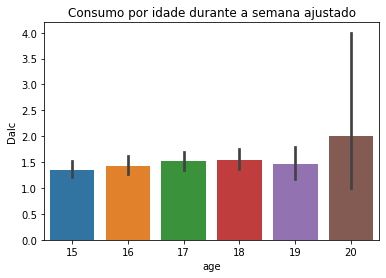

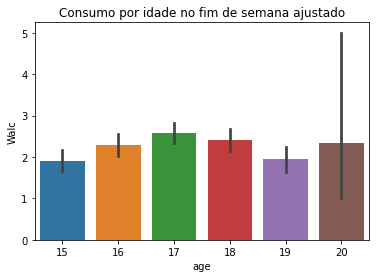

In [11]:
df_idade = df[df.age <= 20]

plt.figure(figsize=(6,4))
sns.barplot(x="age", y="Dalc", data=df_idade)
plt.title("Consumo por idade durante a semana ajustado")
plt.show()

plt.figure(figsize=(6,4))
sns.barplot(x="age", y="Walc", data=df_idade)
plt.title("Consumo por idade no fim de semana ajustado")
plt.show()

Outro fator que pode estar ligado o consumo de bebidas alcoólicas por parte dos jovens é o que tange a vida social, como por exemplo, a composição familiar.

E agora, para melhorar a visualização da análise, criaremos uma só variável que representa o consumo de bebidas alcoólicas durante a semana toda, ou seja, iremos juntar as duas variáveis 'Walc' e 'Dalc'.

In [12]:
df['Talc'] = df['Dalc'] + df['Walc']
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'traveltime', 'studytime', 'failures', 'paid',
       'activities', 'higher', 'internet', 'romantic', 'famrel', 'freetime',
       'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3',
       'Talc'],
      dtype='object')

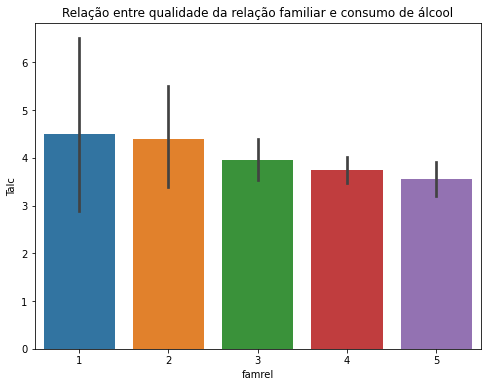

In [13]:
plt.figure(figsize=(8,6))
sns.barplot(x="famrel", y="Talc", data=df)
plt.title("Relação entre qualidade da relação familiar e consumo de álcool")
plt.show()

No gráfico acima foi utilizado duas variáveis, a 'famrel' que representa a qualidade das relações familiare dos alunos que vai de 1 a 5, sendo que 1 significa relação muito ruim e 5 significa relação excelente. E a variável criada 'Talc' que é a representação do consumo de bebidas ao longo da semana.

Com isso, percebemos que a qualidade familiar está ligada com o nível de consumo do estudante, pois nota-se que aqueles que tem relacionameno familiar ruim consome bebidas alcoólicas mais vezes durante a semana do que aqueles que tem relacionamento bom com seus familiares.

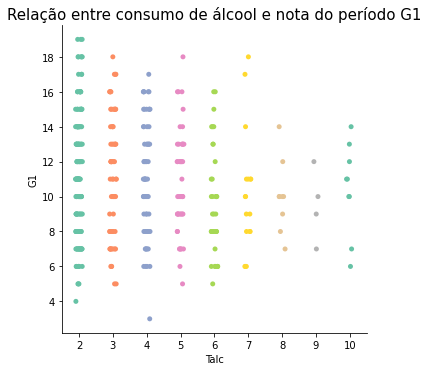

In [14]:
sns.catplot(x="Talc", y="G1", palette="Set2", data=df)
plt.title("Relação entre consumo de álcool e nota do período G1", fontsize=15)
plt.show()

Pelo gráfico acima percebe-se que os estudantes que tem consumo de álcool considerado baixo durante a semana consegue notas maiores no perído G1 (notas de 0 a 20). Enquanto aqueles que tem consumo elevado fica com notas consideravelmente menores.

O mesmo acontece com os estudantes dos períocos 2 e 3, como mostra os gráficos abaixo, em que em média, o consumo maior de álcool está relacionado a uma nota menor no período.

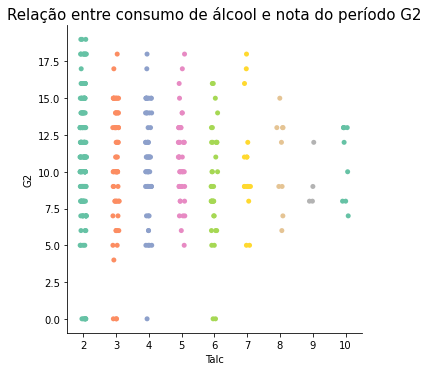

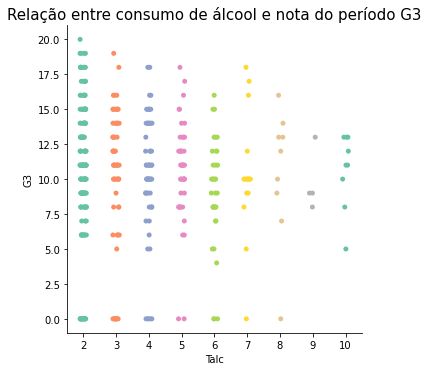

In [15]:
sns.catplot(x="Talc", y="G2", palette="Set2", data=df)
plt.title("Relação entre consumo de álcool e nota do período G2", fontsize=15)

sns.catplot(x="Talc", y="G3", palette="Set2", data=df)
plt.title("Relação entre consumo de álcool e nota do período G3", fontsize=15)
plt.show()

## Definindo o modelo

#### Aqui usaremos apenas as variáveis 'Talc' e 'G3' para saber se há alguma relação entre a nota que o estudante tirou no último período e o consumo de bebidas alcoólicas durante a semana num modelo de regressão linear.

In [18]:
# Preparo de dados
x = df[['Talc']]
y = df['G3']

#Treinamento de modelo
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

modelo = LinearRegression().fit(x_train, y_train)
scores = cross_val_score(modelo, x_train, y_train)

## Coeficiente R²
print(scores)
print(f"Score: {round(scores.mean(), 2)} (+/- {round(scores.std() * 2, 2)})")

[-0.03037771 -0.0710806   0.00882529 -0.05028442 -0.00514484]
Score: -0.03 (+/- 0.06)


### Previsão de modelo

In [20]:
# Previsão
y_pred = modelo.predict(x_test)

# Comparação de modelos
df_compare = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_compare.head()

,Actual,Predicted
329,14,10.603042
318,10,9.999899
317,9,10.753828
65,15,10.603042
59,16,10.753828


### Resultado

In [23]:
print("Model coeficient", modelo.coef_)
print("Model intercept", modelo.intercept_)
print("Mean Absolute Error", metrics.mean_absolute_error(x_test, y_pred))
print("Mean Squared Error", metrics.mean_squared_error(x_test, y_pred))
print("Root Mean Squared Error", np.sqrt(metrics.mean_squared_error(x_test, y_pred)))

Model coeficient [-0.15078572]
Model intercept 11.05539945312441
Mean Absolute Error 7.101542849185968
Mean Squared Error 54.86106598883939
Root Mean Squared Error 7.406825635104379
